<a href="https://colab.research.google.com/github/priba/kornia-examples/blob/master/filter_edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge filtering operations

In this tutorial we are going to learn how to compute the first order and second order derivatives of an image using `kornia.filters`.

## Install Kornia

In [1]:
#!pip install git+https://github.com/arraiyopensource/kornia

import kornia
print(f"Kornia version: {kornia.__version__}")

Kornia version: 0.2.0+cb9373b


Load the image using OpenCV and plot it

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to RGB
img_bgr: np.array = cv2.imread('data/filter/drslump.jpg', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

Create a batch of 4 identical images and normalize it between [0,1]

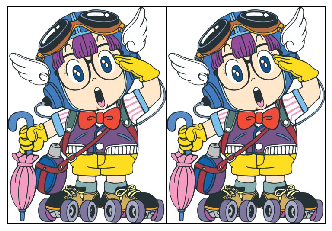

In [11]:
import torch
import torchvision

def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

# stack four identical images
data: torch.Tensor = kornia.image_to_tensor(img_rgb)  # 1xCxHxW
data = data.expand(2, -1, -1, -1)  # 2xCxHxW

# normalize
data = kornia.normalize(data.float(), 0., 255.)

# plot
imshow(data)

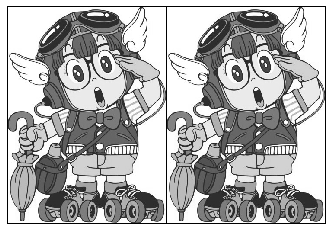

In [12]:
# to gray
x_gray = kornia.rgb_to_grayscale(data)
# plot
imshow(x_gray)

## Filtering Operations
### Compute the 1st order derivates



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


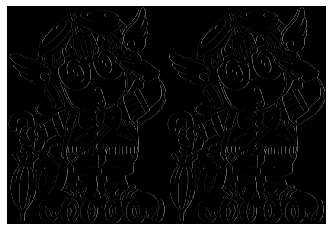

In [13]:
grads: torch.Tensor = kornia.spatial_gradient(x_gray, order=1) # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

imshow(grads_x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


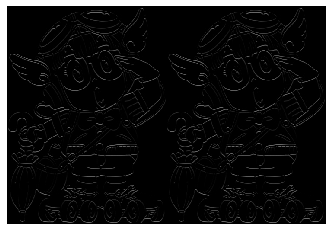

In [14]:
imshow(grads_y)

### Sobel Edges

Once with the gradients in the two directions we can computet the Sobel edges. However, in kornia we already have it implemented.

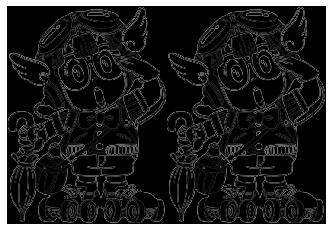

In [15]:
x_sobel: torch.Tensor = kornia.sobel(x_gray)
imshow(x_sobel)

### Compute the 2nd order derivates


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


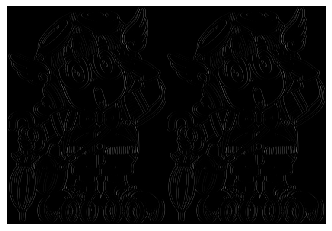

In [16]:
grads: torch.Tensor = kornia.spatial_gradient(x_gray, order=2) # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

imshow(grads_x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


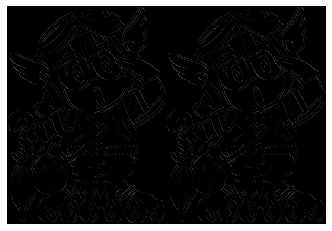

In [17]:
imshow(grads_y)

### Laplacian Edges

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


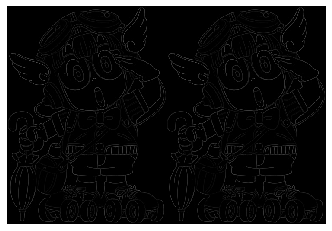

In [18]:
x_laplacian: torch.Tensor = kornia.laplacian(x_gray, kernel_size=5)
imshow(x_laplacian)